In [1]:
pip install pandas numpy scikit-learn xgboost shap streamlit matplotlib seaborn plotly


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv('loan_data.csv')

# Check data
print(df.head())
print(df.info())


   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

C:\Users\SRIRAM\AppData\Local\Temp\ipykernel_4224\1902946603.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_raw = df_raw.applymap(lambda x: x.strip() if isinstance(x, str) else x)


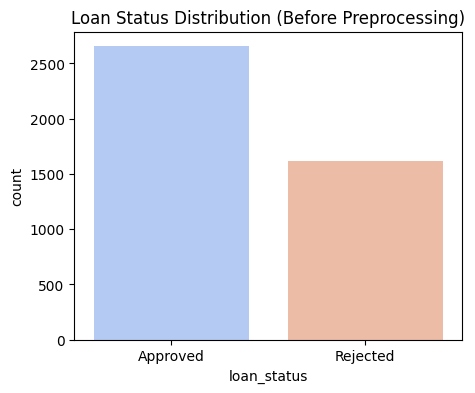

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_raw = pd.read_csv('loan_data.csv')

# Strip whitespace from column names
df_raw.columns = df_raw.columns.str.strip()

# Strip whitespace from all string values
df_raw = df_raw.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Plot Loan Status Distribution Before Preprocessing
plt.figure(figsize=(5, 4))
sns.countplot(x='loan_status', data=df_raw, hue='loan_status', palette="coolwarm", legend=False)
plt.title("Loan Status Distribution (Before Preprocessing)")
plt.show()


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv('loan_data.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Strip whitespace from all string values
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

# Handling missing values
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)  # For categorical data

# Convert 'loan_status' to binary (1 = Approved, 0 = Rejected)
df['loan_status'] = df['loan_status'].replace({'Approved': 1, 'Rejected': 0})
df['loan_status'] = df['loan_status'].astype(int)  # Explicitly cast to int

# Encoding categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for inverse transformation if needed

# Feature Scaling (Exclude loan_status)
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('loan_status', errors='ignore')  # Exclude loan_status

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


# Splitting data
X = df.drop(columns=['loan_status'])  # Ensure correct column name
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Final Output
print(f"Unique values in loan_status: {df['loan_status'].unique()}")
print("✅ Data Preprocessing Completed.")
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Unique values in y (loan_status):", np.unique(y_train))


Unique values in loan_status: [1 0]
✅ Data Preprocessing Completed.
Train set size: (3415, 12)
Test set size: (854, 12)
Unique values in y (loan_status): [0 1]


C:\Users\SRIRAM\AppData\Local\Temp\ipykernel_4224\1397627230.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_status'] = df['loan_status'].replace({'Approved': 1, 'Rejected': 0})


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize traditional models
log_reg = LogisticRegression()


# Train models
log_reg.fit(X_train, y_train)


# Predictions
log_reg_preds = log_reg.predict(X_test)


# Evaluation
log_reg_acc = accuracy_score(y_test, log_reg_preds)


print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}")


Logistic Regression Accuracy: 0.9075


In [9]:
  # 📦 Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from scipy.special import softmax

# 📄 Load and clean data
df = pd.read_csv('loan_data.csv')

# Clean whitespace in column names and values
df.columns = df.columns.str.strip()
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Encode target
df['loan_status'] = df['loan_status'].replace({'Approved': 1, 'Rejected': 0}).astype(int)

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Scale numeric features (excluding target)
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('loan_status')
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Split data
X = df.drop(columns=['loan_status'])
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Show info
print(f"Unique values in loan_status: {df['loan_status'].unique()}")
print("✅ Data Preprocessing Completed.")
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

# 🤖 Initialize models
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# 🔁 Train models
xgb_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# 🔮 Predict classes
xgb_preds = xgb_model.predict(X_test)
gb_preds = gb_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# 🎯 Accuracy
xgb_acc = accuracy_score(y_test, xgb_preds)
gb_acc = accuracy_score(y_test, gb_preds)
rf_acc = accuracy_score(y_test, rf_preds)

print(f"XGBoost Accuracy: {xgb_acc:.4f}")
print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")

# 🔮 Predict Probabilities
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
gb_probs = gb_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# ⚖️ Softmax Weights
accuracies = np.array([xgb_acc, gb_acc, rf_acc])
weights = softmax(accuracies)
print("Softmax-normalized weights:", weights)

# 🧠 DWASM: Weighted average of probabilities
stacked_probs = (weights[0] * xgb_probs) + (weights[1] * gb_probs) + (weights[2] * rf_probs)
final_pred = (stacked_probs >= 0.5).astype(int)

# 🧪 Final Accuracy
dwasm_acc = accuracy_score(y_test, final_pred)
print(f"DWASM Accuracy: {dwasm_acc:.4f}")


C:\Users\SRIRAM\AppData\Local\Temp\ipykernel_4224\1397257641.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_status'] = df['loan_status'].replace({'Approved': 1, 'Rejected': 0}).astype(int)


Unique values in loan_status: [1 0]
✅ Data Preprocessing Completed.
Train set size: (3415, 12)
Test set size: (854, 12)
XGBoost Accuracy: 0.9789
Gradient Boosting Accuracy: 0.9754
Random Forest Accuracy: 0.9789
Softmax-normalized weights: [0.33372342 0.33255315 0.33372342]
DWASM Accuracy: 0.9789
